# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
from sklearn.cluster import KMeans

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
def KMeans_silhouttescore(n_clusters, X): 
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette = silhouette_score(X, cluster_labels)
    print(f'For {n_clusters} clusters silhouette_score is {silhouette:.2f}')

In [4]:
KMeans_silhouttescore(8, X)

For 8 clusters silhouette_score is 0.55


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
KMeans_silhouttescore(5, X)

For 5 clusters silhouette_score is 0.55


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
KMeans_silhouttescore(3, X)

For 3 clusters silhouette_score is 0.57


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabasz**: ratio of within to between cluster dispersion

In [7]:
def KElbowVisualizer(modelo, metrica, kk, X):
    from yellowbrick.cluster import KElbowVisualizer
    model = modelo()
    visualizer = KElbowVisualizer(model, k=kk, metric=metrica).fit(X) # Fit the data to the visualizer
    return visualizer.show()        # Finalize and render the figure

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


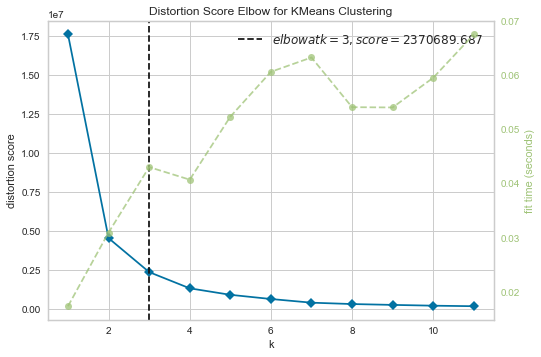

In [8]:
KElbowVisualizer(KMeans, 'distortion',(1,12) , X)

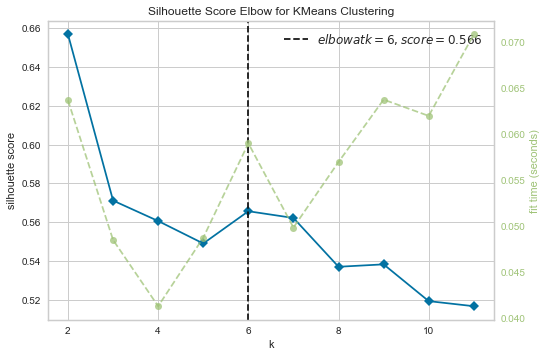

In [9]:
KElbowVisualizer(KMeans, 'silhouette', (2,12),X)

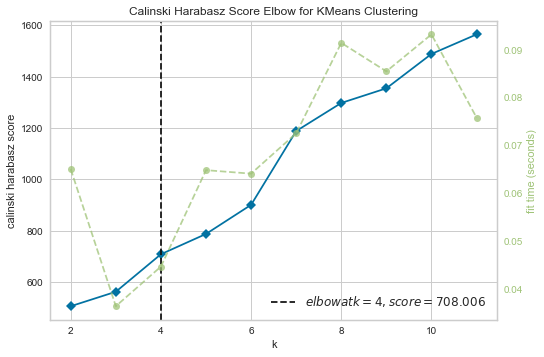

In [10]:
KElbowVisualizer(KMeans, 'calinski_harabasz',(2,12), X)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [11]:
from sklearn.cluster import AgglomerativeClustering


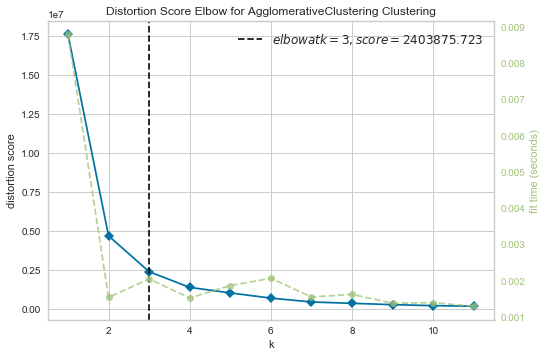

In [12]:
KElbowVisualizer(AgglomerativeClustering, 'distortion',(1,12) , X)

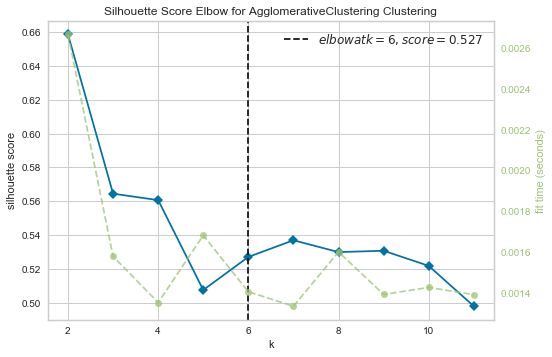

In [13]:
KElbowVisualizer(AgglomerativeClustering, 'silhouette', (2,12),X)

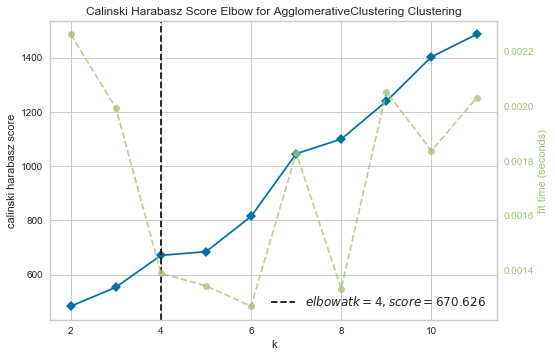

In [14]:
KElbowVisualizer(AgglomerativeClustering, 'calinski_harabasz',(2,12), X)

In [15]:
print('''distortion: 3 clusters
silhouette: 6 clusters
calinski_harabasz: 4 clusters''')

distortion: 3 clusters
silhouette: 6 clusters
calinski_harabasz: 4 clusters


## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [16]:
data_clusters3 = KMeans(n_clusters=3).fit(X)

In [17]:
X = pd.DataFrame(X, columns = wine.feature_names)

In [18]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [19]:
data_clusters3.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [20]:
import seaborn as sns
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']
X['labels'] = data_clusters3.labels_


In [21]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


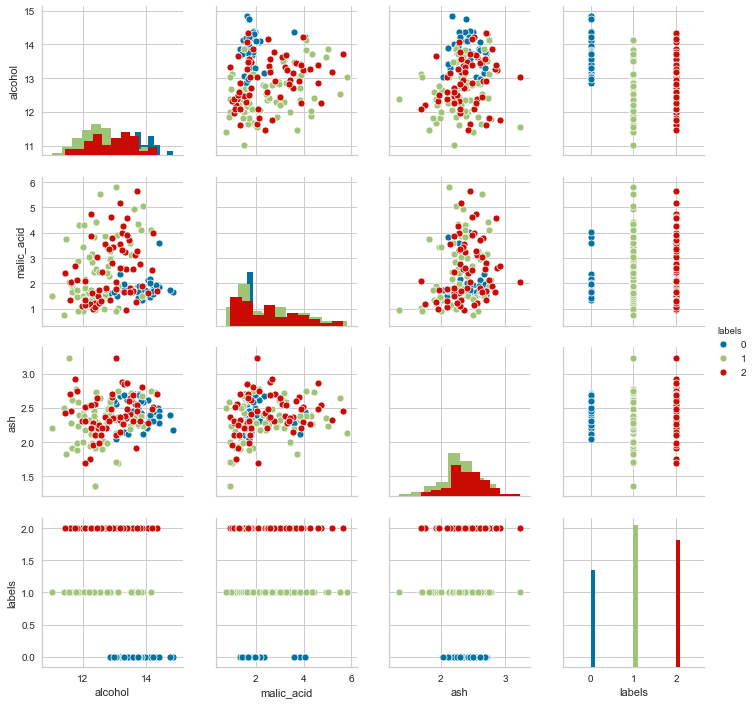

In [22]:
#Primer bin

sns.pairplot(X[bin1], hue='labels', diag_kind='hist')

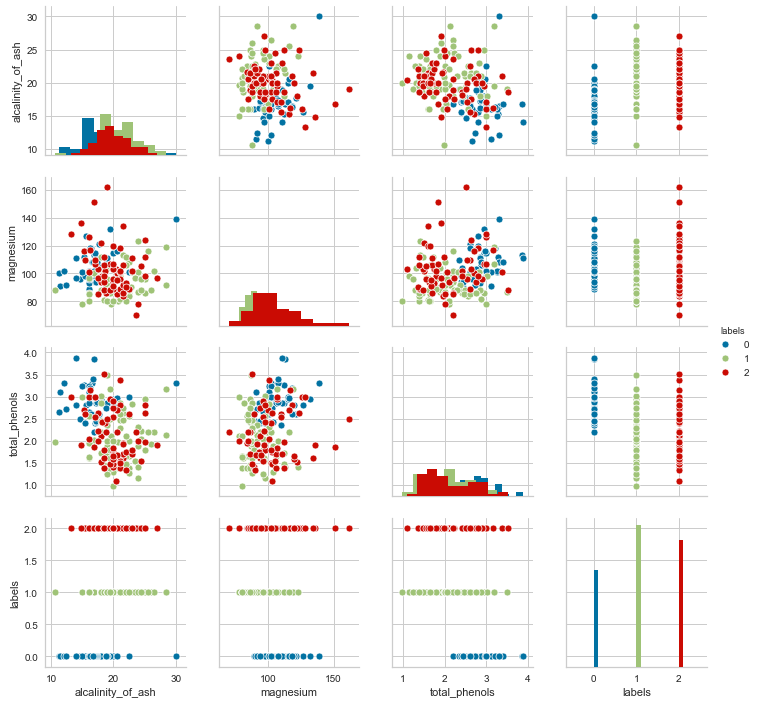

In [23]:
#Segundo bin
sns.pairplot(X[bin2], hue='labels', diag_kind='hist')

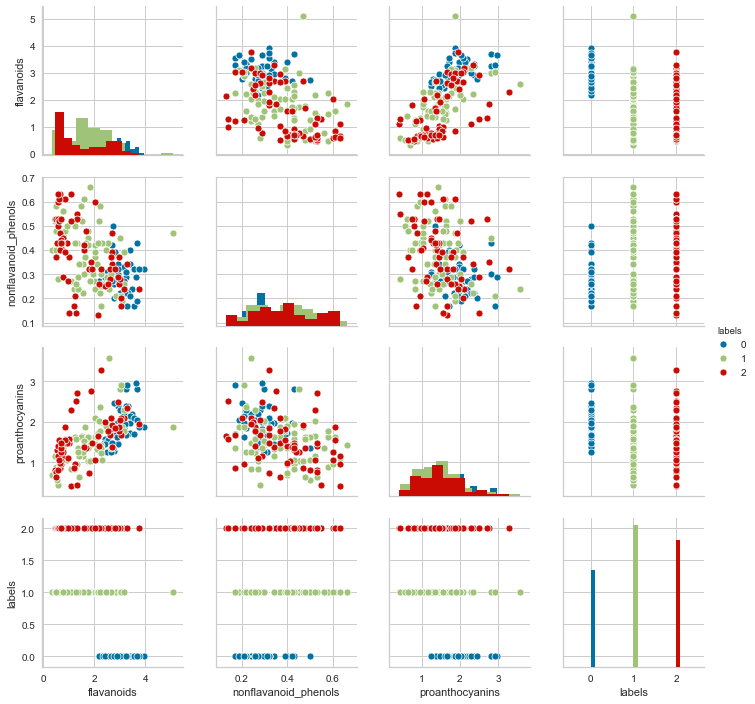

In [24]:
#Tercer bin
sns.pairplot(X[bin3], hue='labels', diag_kind='hist')

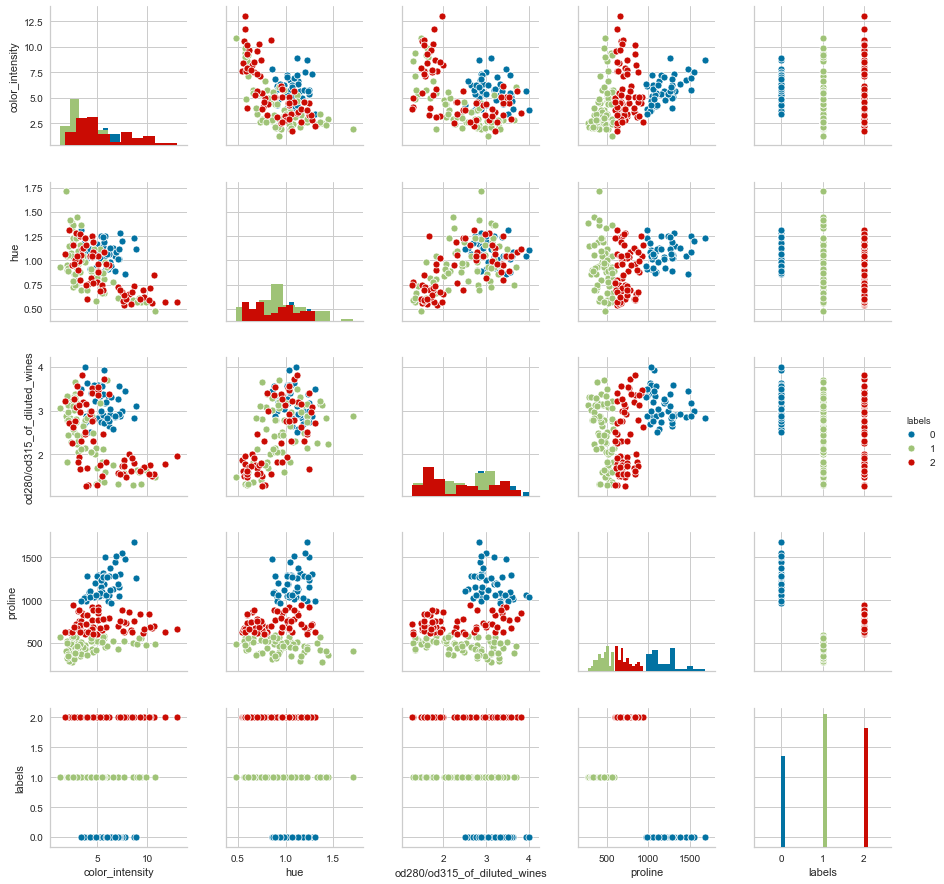

In [25]:
#Cuarto bin
sns.pairplot(X[bin4], hue='labels', diag_kind='hist')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

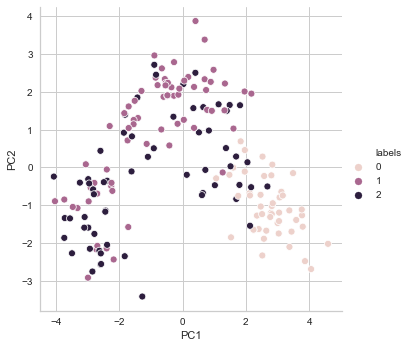

In [26]:
# PCA projection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X_train_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components = 2)
pc = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=pc, columns = ['PC1', 'PC2'])
pca_df['outcome'] = y
sns.relplot(x='PC1', y='PC2', hue=X['labels'], data=pca_df )